In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet

nomArch = '../Datos/Premios2020.csv' 
#-- detectando la codificación de caracteres usada ----
with open(nomArch, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df= pd.read_csv(nomArch, encoding=result['encoding'])
df.head()

,Year,Age,Actor,Sex,Film,nominations,rating,duration,genre1,genre2,release,synopsis
0,1928,44,Emil Jannings,M,The Last Command,2.0,8.0,88,Drama,History,April,A former Imperial Russian general and cousin o...
1,1928,22,Laura Gainor (aka Janet Gaynor),F,Sunrise,5.0,7.8,110,Drama,Romance,NaN,A street cleaner saves a young womans life and...
2,1929,37,Mary Pickford,F,Coquette,1.0,7.3,76,Drama,Romance,April,A flirtatious southern belle is compromised wi...
3,1929,38,Warner Baxter,M,In Old Arizona,5.0,5.8,95,Romance,Western,January,A charming happy-go-lucky bandit in old Arizon...
4,1930,62,George Arliss,M,Disraeli,3.0,6.5,90,Biography,Drama,November,Prime Minister of Great Britain Benjamin Disra...


**Reducción de valores**

In [2]:
opciones = pd.value_counts(df['genre1'])
opciones

Drama        91
Biography    41
Comedy       25
Crime        16
Adventure     6
Action        3
Romance       2
Mystery       1
Thriller      1
Name: genre1, dtype: int64

In [3]:
# Reemplazando valores
df['genre1'] = df['genre1'].replace(['Adventure','Action', \
              'Romance', 'Thriller', 'Mystery'], 'Otra')

# revisar cómo quedó
opciones2 = pd.value_counts(df['genre1'])
opciones2

Drama        91
Biography    41
Comedy       25
Crime        16
Otra         13
Name: genre1, dtype: int64

**Completando datos faltantes**

In [4]:
values = {'nominations': df['nominations'].min(), 'rating': 5}
df.fillna(value=values, inplace=True)
df.isnull().sum()

Year            0
Age             0
Actor           0
Sex             0
Film            0
nominations     0
rating          0
duration        0
genre1          0
genre2         37
release         4
synopsis        0
dtype: int64

In [5]:
modaGen = df['genre2'].mode()[0]

print("La MODA del atributo 'genre2' es ", modaGen)

df['genre2'] = df['genre2'].replace(np.nan, modaGen)
df.isnull().sum()


La MODA del atributo 'genre2' es  Drama


Year           0
Age            0
Actor          0
Sex            0
Film           0
nominations    0
rating         0
duration       0
genre1         0
genre2         0
release        4
synopsis       0
dtype: int64

**Generando un nuevo atributo**

In [6]:
LD = ['NO'] * len(df)
for i in range(len(df)):
    if df['duration'][i] > 120:
        LD[i] = 'SI'
# Agregando un atributo al DataFrame
df = df.assign( largaDuracion = LD )

print('Atributo largaDuracion')
print(pd.value_counts(df['largaDuracion']))


Atributo largaDuracion
NO    112
SI     74
Name: largaDuracion, dtype: int64


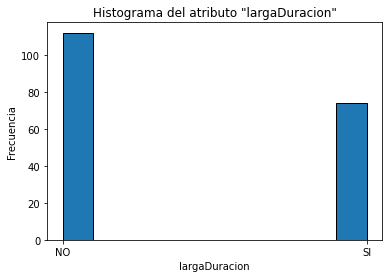

In [7]:
plt.figure()
plt.hist(df['largaDuracion'], bins = 10, edgecolor = 'black', \
         linewidth=1)
plt.xlabel('largaDuracion')
plt.ylabel('Frecuencia')
plt.title('Histograma del atributo "largaDuracion"')
plt.show()